**DATASET ON POTENTIAL CUSTOMER**

The dataset is about customer purchasing history, this analysis is to ID potential customer.




In [ ]:
# Wrangling and EDA with Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

from statsmodels.graphics.gofplots import qqplot

# SQL data query 
import csv
import sqlite3
from sqlite3 import Error

In [ ]:
#reading data
df = pd.read_csv('data.csv')
df.head(5)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [ ]:
#checking for missung value
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Potential_Customer - 0%
Cust_Last_Purchase - 52%
Pur_3_years - 0%
Pur_5_years - 0%
Pur_3_years_Indirect - 0%
Pur_5_years_Indirect - 0%
Pur_latest - 0%
Pur_3_years_Avg - 0%
Pur_5_years_Avg - 0%
Pur_3_years_Avg_Indirect - 18%
InAct_Last - 0%
InAct_First - 0%
Ad_Res_1_year - 0%
Ad_Res_3_Year - 0%
Ad_Res_5_Year - 0%
Ad_Res_Ind_1_Year - 0%
Ad_Res_Ind_3_Year - 0%
Ad_Res_Ind_5_Year - 0%
Status_Cust - 0%
Status_Latest_Ad - 0%
Age - 22%
Gender - 0%
Cust_Prop - 0%
Cust_Ann_Income - 0%


In [ ]:
df.corr(method="pearson") 

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
Potential_Customer,1.000000,NaN,0.147106,0.097972,0.135133,0.098305,-0.101008,-0.103504,-0.111500,-0.114940,...,0.070813,0.053949,0.077662,0.080109,0.063209,0.097746,0.073056,0.110590,0.042249,-0.021580
Cust_Last_Purchase,NaN,1.000000,-0.322553,-0.211361,-0.273108,-0.236708,0.776690,0.724706,0.620225,0.739081,...,-0.133234,0.069792,0.007594,-0.077098,-0.001391,-0.137434,-0.112825,-0.230314,-0.073865,0.061243
Pur_3_years,0.147106,-0.322553,1.000000,0.557350,0.842210,0.540581,-0.349252,-0.355583,-0.369803,-0.376704,...,0.190738,0.197819,0.384991,0.301513,0.344823,0.593459,0.330041,0.456353,0.064089,-0.074388
Pur_5_years,0.097972,-0.211361,0.557350,1.000000,0.478441,0.905120,-0.260562,-0.248276,-0.339597,-0.240580,...,0.709486,0.321440,0.466951,0.790215,0.240929,0.427481,0.756462,0.580379,0.186004,-0.043361
Pur_3_years_Indirect,0.135133,-0.273108,0.842210,0.478441,1.000000,0.566286,-0.296213,-0.293545,-0.292267,-0.300027,...,0.129750,0.165172,0.275014,0.231537,0.274756,0.639989,0.252604,0.424891,0.045681,-0.044092
Pur_5_years_Indirect,0.098305,-0.236708,0.540581,0.905120,0.566286,1.000000,-0.266606,-0.257339,-0.361608,-0.245621,...,0.747152,0.181457,0.368464,0.750877,0.179324,0.457074,0.779955,0.641133,0.177435,-0.041983
Pur_latest,-0.101008,0.776690,-0.349252,-0.260562,-0.296213,-0.266606,1.000000,0.786184,0.747429,0.742934,...,-0.142707,0.033439,-0.022255,-0.106823,0.001693,-0.133058,-0.121806,-0.273792,-0.055970,0.071228
Pur_3_years_Avg,-0.103504,0.724706,-0.355583,-0.248276,-0.293545,-0.257339,0.786184,1.000000,0.881783,0.976536,...,-0.121262,0.085542,0.032629,-0.072774,0.019759,-0.115329,-0.096414,-0.265267,-0.060070,0.055722
Pur_5_years_Avg,-0.111500,0.620225,-0.369803,-0.339597,-0.292267,-0.361608,0.747429,0.881783,1.000000,0.878690,...,-0.297026,0.080269,-0.090136,-0.215725,-0.018264,-0.179683,-0.261724,-0.360026,-0.094175,0.062140
Pur_3_years_Avg_Indirect,-0.114940,0.739081,-0.376704,-0.240580,-0.300027,-0.245621,0.742934,0.976536,0.878690,1.000000,...,-0.123559,0.096935,0.011648,-0.070572,0.010423,-0.053453,-0.100258,-0.275478,-0.050661,0.059273


In [ ]:
# removing duplicates 
df.duplicated().sum()

851

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
#removing C_ID (not relevant)
df.drop('C_ID', axis = 1, inplace =True)


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   object 
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   object 
 7   Pur_3_years_Avg           3618 non-null   object 
 8   Pur_5_years_Avg           3618 non-null   object 
 9   Pur_3_years_Avg_Indirect  2956 non-null   object 
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

In [ ]:
#removing $ and , in data
df['Cust_Last_Purchase']=df['Cust_Last_Purchase'].str.replace('$','').replace(',','', regex=True)
df['Cust_Ann_Income'] = df['Cust_Ann_Income'].str.replace('$','').replace(',','' , regex = True)
df['Pur_3_years_Avg'] = df['Pur_3_years_Avg'].str.replace('$','')
df['Pur_5_years_Avg'] = df['Pur_5_years_Avg'].str.replace('$','')
df['Pur_latest'] = df['Pur_latest'].str.replace('$','')
df['Pur_3_years_Avg_Indirect'] = df['Pur_3_years_Avg_Indirect'].str.replace('$','')

df.head()


,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,5.00,2,17,2,4,0.00,7.50,7.76,7.50,...,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,30.00,1,7,0,3,25.00,25.00,13.00,NaN,...,55,6,6,22,A,1,7.0,M,U,0.00
2,0,NaN,5,12,3,5,15.00,15.00,11.25,14.67,...,53,6,17,22,S,1,79.0,F,U,0.00
3,1,20.00,1,11,0,3,20.00,20.00,12.45,NaN,...,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,5.00,3,15,2,7,3.00,4.33,3.80,4.00,...,63,6,12,24,S,1,68.0,F,H,113663.00


In [ ]:
# change data type from object to numeric
col_list = ['Pur_3_years_Avg','Pur_5_years_Avg','Pur_3_years_Avg_Indirect','Pur_latest','Cust_Ann_Income','Cust_Last_Purchase']
df[col_list] = df[col_list].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   float64
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   float64
 7   Pur_3_years_Avg           3618 non-null   float64
 8   Pur_5_years_Avg           3618 non-null   float64
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

In [ ]:
df['Gender'].unique()
# F = female, M = male, U = unknown

array(['F', 'M', 'U'], dtype=object)

In [ ]:
df['Status_Cust'].unique()
# A=active buyer, S=star buyer, E = inective buyer, F=first time buyer, N= new buyer, L= lapsing buyer

array(['A', 'S', 'E', 'F', 'N', 'L'], dtype=object)

**EDA**
Graphs and relationships

**'GENDER & CUSTOMER'S STATUS'**

[Text(0.5, 1.0, "Customer's_Gender")]

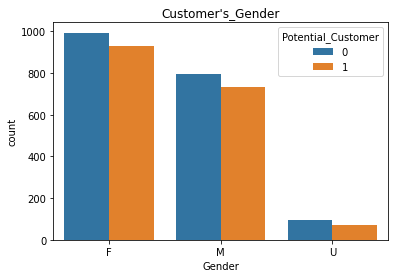

In [ ]:
sns.countplot(x ='Gender', hue = 'Potential_Customer',data = df).set(title="Customer's_Gender") 

In [ ]:
df.Gender.value_counts()

F    1922
M    1530
U     166
Name: Gender, dtype: int64

In [ ]:
#clean gender
# change unknown to female - as female is the mode 
df['Gender']=df['Gender'].replace('U','F')

In [ ]:
df.Gender.value_counts()

F    2088
M    1530
Name: Gender, dtype: int64

**Target gender** should be female since they make the most % of potential customer & the most % of active buyer and star buyer.

[Text(0.5, 1.0, "Potential_Customer's_Gender")]

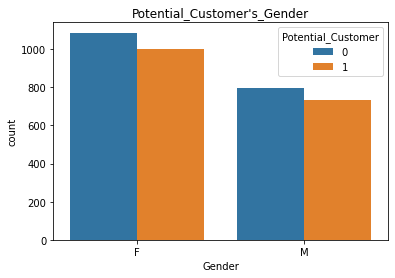

In [ ]:
sns.countplot(x ='Gender', hue = 'Potential_Customer',data = df).set(title="Potential_Customer's_Gender") 

[Text(0.5, 1.0, "Potential_Customer's_Gender_Classification")]

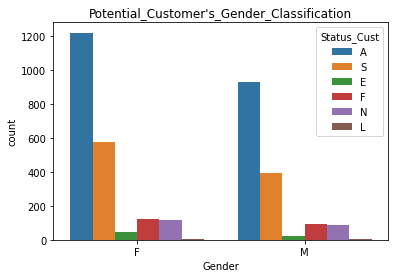

In [ ]:
sns.countplot(x ='Gender', hue = 'Status_Cust',data = df).set(title="Potential_Customer's_Gender_Classification")

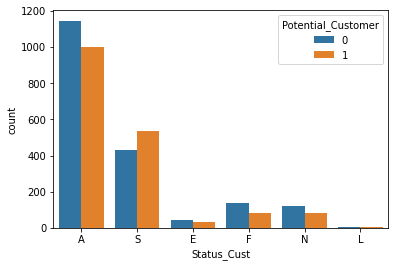

In [ ]:
#clean potential customer column
# combine E,F,N,L into one group since they only makes a small % and we only interested in active and star buyer
sns.countplot(x ='Status_Cust' , hue='Potential_Customer',data = df)

In [ ]:
df.Status_Cust.value_counts()

A    2146
S     964
F     219
N     207
E      72
L      10
Name: Status_Cust, dtype: int64

In [ ]:
# O = others
df['Status_Cust']=df['Status_Cust'].replace('F','O').replace('N','O').replace('E','O').replace('L','O')

In [ ]:
df.Status_Cust.value_counts()

A    2146
S     964
O     508
Name: Status_Cust, dtype: int64

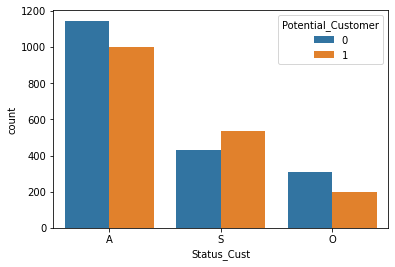

In [ ]:
sns.countplot(x ='Status_Cust' , hue='Potential_Customer',data = df)

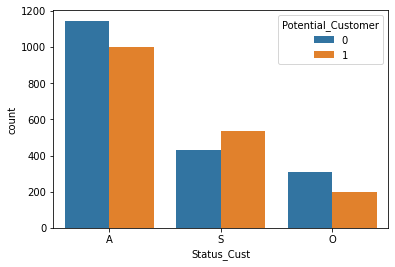

In [ ]:
# gender grpah again but cleaned
sns.countplot(x ='Status_Cust' , hue='Potential_Customer',data = df)

**'Pur_latest'**

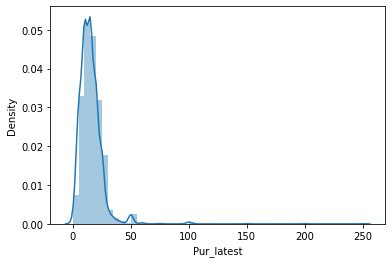

In [ ]:
sns.distplot(df['Pur_latest'])

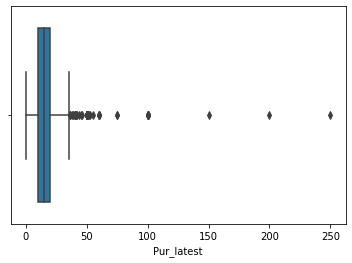

In [ ]:
sns.boxplot(df['Pur_latest'])

In [ ]:
# checking number of outliers
outliers = df.loc[:, 'Pur_latest']
outliers.max()-outliers.min()
q1_outliers, q3_outliers = outliers.quantile((.25, .75))
range_outliers = q3_outliers - q1_outliers
iqr_outliers = iqr(outliers)
lf_outliers = q1_outliers - 1.5 * iqr_outliers
uf_outliers = q3_outliers + 1.5 * iqr_outliers
outliers_data = outliers[((outliers< lf_outliers) | (outliers > uf_outliers))]
n_outliers_data=len(outliers_data)
outliers_data
len(outliers_data)

86

In [ ]:
df.Pur_latest.isnull().sum()

0

In [ ]:
# outlier number is small (86) compared to total (3618) - we will remove the outliers
df.Pur_latest.count()

3618

In [ ]:
a = df['Pur_latest']

print('Five Figure Summary\n'
f"""
The minimum is {min(a)}
The first quartile is {np.quantile(a,.25)}
The median is {np.median(a)}
The third quartile is {np.quantile(a,.75)}
The maximum is {max(a)}
The range is {max(a) - min(a)}
The IQR is {iqr(a)}
The lower fence is {np.quantile(a,.25) - 1.5 * iqr(a)}
The upper fence is {np.quantile(a,.75) + 1.5 * iqr(a)}
""")

Five Figure Summary

The minimum is 0.0
The first quartile is 10.0
The median is 15.0
The third quartile is 20.0
The maximum is 250.0
The range is 250.0
The IQR is 10.0
The lower fence is -5.0
The upper fence is 35.0



-from the 5 figure summary... there are no ouliers under lower fence.

In [ ]:
df[df['Pur_latest'] > 35]

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
50,0,NaN,3,23,2,11,52.0,48.67,38.87,49.5,...,112,6,17,33,S,1,NaN,M,H,87767.0
64,0,NaN,2,2,2,2,50.0,37.50,37.50,37.5,...,25,6,13,11,A,0,65.0,M,H,42613.0
103,0,NaN,1,11,0,4,50.0,34.00,36.64,NaN,...,65,6,6,25,A,0,71.0,F,H,88668.0
104,1,25.0,2,6,2,4,50.0,50.00,35.00,50.0,...,54,6,16,21,A,0,50.0,M,H,88668.0
118,0,NaN,2,2,2,2,50.0,50.00,50.00,50.0,...,24,6,12,10,O,0,57.0,F,H,70339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,0,NaN,2,6,1,3,50.0,35.00,20.00,50.0,...,55,5,13,20,A,0,NaN,M,H,64945.0
3300,1,42.0,4,7,2,4,40.0,35.50,30.29,37.5,...,54,6,17,21,A,0,87.0,M,H,76519.0
3347,0,NaN,2,3,1,2,40.0,32.50,26.67,25.0,...,35,6,17,16,A,0,50.0,F,U,0.0
3354,0,NaN,2,2,1,1,40.0,40.00,40.00,40.0,...,26,6,13,11,A,0,33.0,F,H,106850.0


In [ ]:
df.skew()

Potential_Customer          0.080807
Cust_Last_Purchase          4.966810
Pur_3_years                 1.291322
Pur_5_years                 2.079296
Pur_3_years_Indirect        1.124769
Pur_5_years_Indirect        1.287071
Pur_latest                  6.660116
Pur_3_years_Avg             7.913836
Pur_5_years_Avg             6.756579
Pur_3_years_Avg_Indirect    8.043963
InAct_Last                 -0.808274
InAct_First                 0.136455
Ad_Res_1_year               2.788479
Ad_Res_3_Year               0.321259
Ad_Res_5_Year               0.401333
Ad_Res_Ind_1_Year           0.943712
Ad_Res_Ind_3_Year          -0.448007
Ad_Res_Ind_5_Year           0.068045
Status_Latest_Ad           -0.276913
Age                        -0.406354
Cust_Ann_Income             0.039826
dtype: float64

In [ ]:
df.kurtosis()

Potential_Customer           -1.994573
Cust_Last_Purchase           51.839743
Pur_3_years                   2.115542
Pur_5_years                   8.114353
Pur_3_years_Indirect          1.375351
Pur_5_years_Indirect          2.046352
Pur_latest                  101.756152
Pur_3_years_Avg             145.520014
Pur_5_years_Avg             112.633657
Pur_3_years_Avg_Indirect    159.364308
InAct_Last                    2.506173
InAct_First                  -1.171029
Ad_Res_1_year                10.520905
Ad_Res_3_Year                 2.171718
Ad_Res_5_Year                 0.235607
Ad_Res_Ind_1_Year             7.304920
Ad_Res_Ind_3_Year            -0.898953
Ad_Res_Ind_5_Year            -0.813542
Status_Latest_Ad             -1.924383
Age                          -0.441947
Cust_Ann_Income               0.438975
dtype: float64

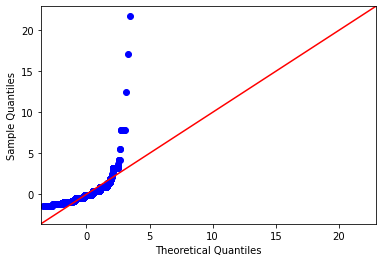

In [ ]:
# qqplot before remove outliers
fg = qqplot(df["Pur_latest"], fit = True, line = '45')

In [ ]:
a= df['Pur_latest'] > 35
a.value_counts()

False    3532
True       86
Name: Pur_latest, dtype: int64

In [ ]:
# remove outliers
outliers_low=(df["Pur_latest"]) < lf_outliers
outliers_up=(df["Pur_latest"]) > uf_outliers
df["Pur_latest"][~(outliers_low | outliers_up)]
df= df [~(outliers_low | outliers_up)]
a= df['Pur_latest'] > 35

a.value_counts()


False    3532
Name: Pur_latest, dtype: int64

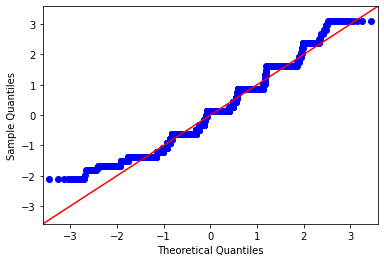

In [ ]:
# qqplot after remove outliers
fg = qqplot(df["Pur_latest"], fit = True, line = '45')

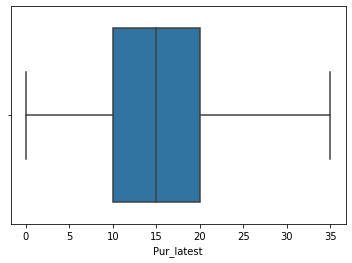

In [ ]:
sns.boxplot(df['Pur_latest'])

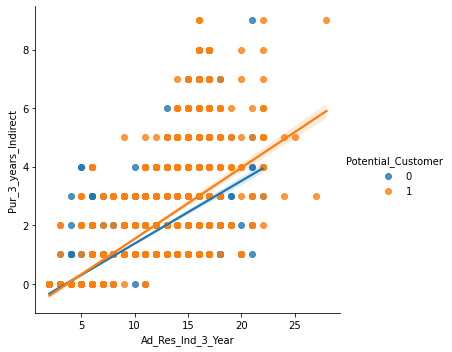

In [ ]:
sns.lmplot(x ='Ad_Res_Ind_3_Year' ,y = 'Pur_3_years_Indirect', hue='Potential_Customer',data = df)

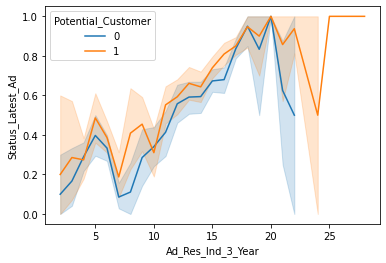

In [ ]:
sns.lineplot(x ='Ad_Res_Ind_3_Year' ,y = 'Status_Latest_Ad', hue='Potential_Customer',data = df)

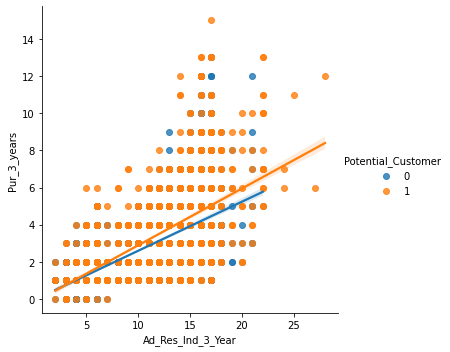

In [ ]:
sns.lmplot(x ='Ad_Res_Ind_3_Year' ,y = 'Pur_3_years', hue='Potential_Customer',data = df)

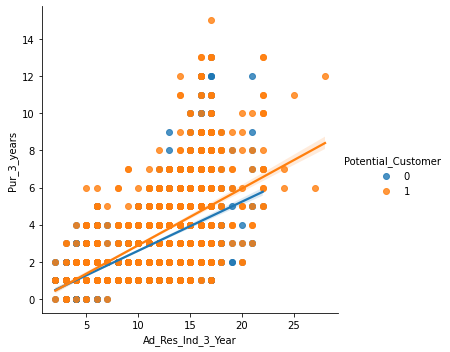

In [ ]:
sns.lmplot(x ='Ad_Res_Ind_3_Year' ,y = 'Pur_3_years', hue='Potential_Customer',data = df)

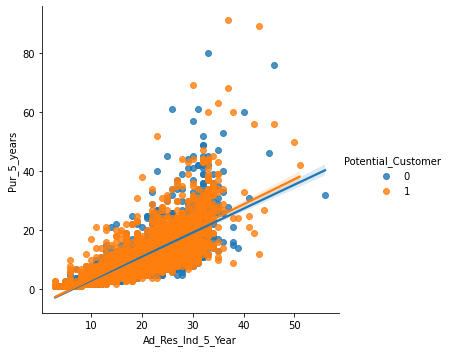

In [ ]:
sns.lmplot(x ='Ad_Res_Ind_5_Year' ,y = 'Pur_5_years', hue='Potential_Customer',data = df)